In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from autorank import autorank, create_report, plot_stats, latex_table

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install autorank


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [ ]:
df1 = pd.read_csv("/content/data_hema_F1.csv")


In [ ]:
df1



,EBR,ECC,EPS,RAkEL,Adaboost.MH,MLkNN,EMSTE
0,5,4,6,6,7,3,1
1,4,3,5,6,7,2,1
2,4,3,5,6,7,1,2
3,4,6,3,4,7,4,1
4,5,4,5,2,1,7,4
5,5,2,6,7,4,5,1
6,6,4,4,5,3,2,1
7,3,3,6,4,7,4,1
8,4,3,6,5,2,4,1
9,5,4,3,6,7,2,1


In [ ]:
res = autorank(df1, alpha=0.05, verbose=False)
print(res)

RankResult(rankdf=
             meanrank  median     mad ci_lower ci_upper effect_size   magnitude
RAkEL            2.70     5.5  0.7413        2        7           0  negligible
Adaboost.MH      2.90     7.0       0        1        7    -2.86162       large
EPS              3.05     5.0  1.4826        3        6    0.426585       small
 EBR             3.50     4.5  0.7413        3        6     1.34898       large
ECC              4.55     3.5  0.7413        2        6     2.69796       large
MLkNN            4.65     3.5  2.2239        1        7     1.20657       large
EMSTE            6.65     1.0       0        1        4     8.58487       large
pvalue=0.00023851077918779587
cd=2.848314607025562
omnibus=friedman
posthoc=nemenyi
all_normal=False
pvals_shapiro=[0.2575514614582062, 0.08975173532962799, 0.028023045510053635, 0.2045045644044876, 0.002976025454699993, 0.46340128779411316, 3.671610556921223e-06]
homoscedastic=True
pval_homogeneity=0.18353569552923488
homogeneity_test=lev

The statistical analysis was conducted for 7 populations with 10 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations ECC (p=0.003) and EMSTE (p=0.000). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and some of them are not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the median (MD), the median absolute deviation (MAD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if the difference of the mean rank is greater than the critical distance CD=2.848 of the Nemenyi test.
We reject the null hypothesis (p=0.000) of the Friedman test that there is

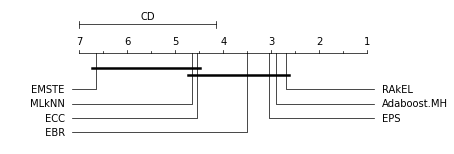

\begin{table}[h]
\centering
\begin{tabular}{lrrllll}
\toprule
{} &    MR &   MED &   MAD &              CI & $\gamma$ &   Magnitude \\
\midrule
RAkEL       & 2.700 & 5.500 & 0.741 &  [2.000, 7.000] &     0.000 &  negligible \\
Adaboost.MH & 2.900 & 7.000 & 0.000 &  [1.000, 7.000] &    -2.862 &       large \\
EPS         & 3.050 & 5.000 & 1.483 &  [3.000, 6.000] &     0.427 &       small \\
 EBR        & 3.500 & 4.500 & 0.741 &  [3.000, 6.000] &     1.349 &       large \\
ECC         & 4.550 & 3.500 & 0.741 &  [2.000, 6.000] &     2.698 &       large \\
MLkNN       & 4.650 & 3.500 & 2.224 &  [1.000, 7.000] &     1.207 &       large \\
EMSTE       & 6.650 & 1.000 & 0.000 &  [1.000, 4.000] &     8.585 &       large \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


In [ ]:
create_report(res)
plot_stats(res)
plt.show()
latex_table(res)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from autorank import autorank, create_report, plot_stats, latex_table

np.random.seed(42)
pd.set_option('display.max_columns', 7)
std = 0.3
means = [0.2, 0.3, 0.5, 0.8, 0.85, 0.9]
sample_size = 50
data = pd.DataFrame()
for i, mean in enumerate(means):
    data['pop_%i' % i] = np.random.normal(mean, std, sample_size).clip(0, 1)
print(data)


       pop_0     pop_1     pop_2     pop_3     pop_4     pop_5
0   0.349014  0.397225  0.075389  0.875148  0.957336  0.521735
1   0.158521  0.184475  0.373806  0.903934  1.000000  1.000000
2   0.394307  0.096923  0.397186  0.595993  1.000000  1.000000
3   0.656909  0.483503  0.259317  0.869676  1.000000  1.000000
4   0.129754  0.609300  0.451614  0.887922  0.436699  0.444189
5   0.129759  0.579384  0.621215  0.585695  0.568652  0.754730
6   0.673764  0.048235  1.000000  1.000000  1.000000  1.000000
7   0.430230  0.207236  0.552373  0.942150  1.000000  0.687699
8   0.059158  0.399379  0.577265  0.442609  1.000000  1.000000
9   0.362768  0.592664  0.477666  0.996966  1.000000  1.000000
10  0.060975  0.156248  0.000000  0.507595  1.000000  0.621921
11  0.060281  0.244302  0.492046  1.000000  1.000000  0.882142
12  0.272589  0.000000  0.518069  1.000000  1.000000  0.000000
13  0.000000  0.000000  1.000000  0.553795  1.000000  0.592684
14  0.000000  0.543758  0.442292  1.000000  0.755419  0

In [ ]:
res = autorank(data, alpha=0.05, verbose=False)
print(res)


RankResult(rankdf=
       meanrank    median       mad  ci_lower  ci_upper effect_size  \
pop_5      2.18  0.912005  0.130461  0.692127         1           0   
pop_4      2.29  0.910437  0.132786  0.654001         1   0.0119148   
pop_3      2.47  0.858091  0.210394  0.573879         1    0.307991   
pop_2      3.95  0.505057  0.333594  0.227184   0.72558     1.60669   
pop_1      4.71  0.313824  0.247339  0.149473  0.546571     3.02519   
pop_0      5.40  0.129756  0.192377         0  0.349014     4.75934   

        magnitude  
pop_5  negligible  
pop_4  negligible  
pop_3       small  
pop_2       large  
pop_1       large  
pop_0       large  
pvalue=2.3412212612346733e-28
cd=1.0662484349869374
omnibus=friedman
posthoc=nemenyi
all_normal=False
pvals_shapiro=[1.646607051952742e-05, 0.0605173334479332, 0.13884511590003967, 0.00010030837438534945, 2.066387423838023e-06, 1.5319776593969436e-06]
homoscedastic=True
pval_homogeneity=0.2663177301695518
homogeneity_test=levene
alpha=0.05
a

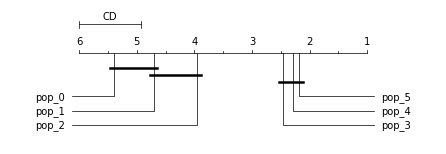

In [ ]:
#create_report(res)
plot_stats(res)
plt.show()
#latex_table(res)

In [ ]:
pip install autorank

In [ ]:
!git clone https://github.com/hfawaz/cd-diagram.git

Cloning into 'cd-diagram'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 35 (delta 1), reused 6 (delta 1), pack-reused 28
Unpacking objects: 100% (35/35), done.


In [ ]:
%cd cd-diagram/

/content/cd-diagram


In [ ]:
!python main.py

['clf3' 'clf5' 'clf1' 'clf4' 'clf2']
clf1    1.0
clf2    0.0
clf3    7.0
clf4    0.0
clf5    4.0
dtype: float64
clf1    4.200000
clf2    3.766667
clf4    3.500000
clf5    2.000000
clf3    1.533333
dtype: float64
('clf2', 'clf3', 0.0007229186187432429, True)
('clf1', 'clf3', 0.0008052762369668134, True)
('clf2', 'clf5', 0.0008052762369668134, True)
('clf3', 'clf4', 0.0008685535665822177, True)
('clf1', 'clf5', 0.002610776740525937, True)
('clf4', 'clf5', 0.002854354799586081, True)
('clf1', 'clf4', 0.019877958489914162, False)
('clf1', 'clf2', 0.06914397389751895, False)
('clf2', 'clf4', 0.22194815136169888, False)
('clf3', 'clf5', 0.36076268578167103, False)
Index(['clf1', 'clf2', 'clf4', 'clf5', 'clf3'], dtype='object')
[0, 1, 2]
[3, 4]
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


In [ ]:
!pip install python==2.7.0

ERROR: Could not find a version that satisfies the requirement python==2.7.0 (from versions: none)
ERROR: No matching distribution found for python==2.7.0


In [ ]:
import Orange 
import matplotlib.pyplot as plt
names = ["EBR", "ECC", "EPS", "RAkEL","Adaboost.MH","MLkNN","EMSTE"]
avranks = [4.5,4.9,5.3,4.5,3.6,3.3,1.9]
cd = Orange.evaluation.compute_CD(avranks, 10,alpha="0.05", test="bonferroni-dunn") #tested on 10 datasets 
print("cd=",cd)
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=5, textspace=1.5, cdmethod=0)
plt.show();

ModuleNotFoundError: ignored

In [ ]:
!pip install Orange

     |████████████████████████████████| 15.0 MB 179 kB/s 
     |████████████████████████████████| 15.0 MB 160 kB/s 
     |████████████████████████████████| 15.6 MB 108 kB/s 
     |████████████████████████████████| 14.5 MB 167 kB/s 
     |████████████████████████████████| 15.7 MB 54 kB/s 
     |████████████████████████████████| 14.4 MB 151 kB/s 
     |████████████████████████████████| 12.6 MB 57 kB/s 
     |████████████████████████████████| 12.7 MB 50 kB/s 
     |████████████████████████████████| 13.3 MB 194 kB/s 
     |████████████████████████████████| 20.4 MB 1.4 MB/s 
ERROR: Could not find a version that satisfies the requirement Orange (from versions: 2.0.0b0, 2.0.1b0, 2.5a1, 2.5a2, 2.5a4, 2.6, 2.7, 2.7.1, 2.7.2, 2.7.3, 2.7.5, 2.7.7, 2.7.8)
ERROR: No matching distribution found for Orange


In [ ]:
avranks = np.array([4.5,4.9,5.3,4.5,3.6,3.3,1.9])

In [ ]:
import pandas as pd

In [ ]:
avranks_df = pd.DataFrame(avranks)

In [ ]:
res = autorank(avranks_df, alpha=0.05, verbose=False)

ValueError: ignored